# San Silvestre 2021

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_hist, get_mine, plot_grid, TIEMPOS, RITMOS, ritmo2minutes
import matplotlib as mpl
import seaborn as sns
import os
if not "JPY_PARENT_PID" in os.environ:
    mpl.use('Qt5Cairo')
    plt.ion()
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
%precision %.2f

'%.2f'

In [2]:
data = load_data()
data.head()

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",...,Sexo,"Tiempo Km. 2,5 (Minutos)",Tiempo Km. 5 (Minutos),"Tiempo Km. 7,5 (Minutos)",Tiempo Km. 10 (Minutos),Ritmo Km. (Minutos),"Ritmo Min/Km. 2,5",Ritmo Min/Km. 5,"Ritmo Min/Km. 7,5",Ritmo Min/Km. 10
0,36417,David Bascuñana Corrales,M-35,1,1,0:29:13,"2'55""/km",0:07:09,0:14:17,0:21:03,...,M,7.15,14.28,21.05,29.22,2.92,2.86,2.86,2.81,2.92
1,27702,Jaouad El Bissis El Bissis,M-35,2,2,0:29:18,"2'55""/km",0:07:09,0:14:17,0:21:09,...,M,7.15,14.28,21.15,29.30,2.92,2.86,2.86,2.82,2.93
2,29141,Luis Agustín Escriche,Sénior M,3,1,0:30:30,"3'03""/km",0:07:23,0:14:37,0:21:46,...,M,7.38,14.62,21.77,30.50,3.05,2.95,2.92,2.90,3.05
3,22312,Javier Martinez Fernández,M-35,4,3,0:30:48,"3'04""/km",0:07:24,0:14:54,0:22:07,...,M,7.40,14.90,22.12,30.80,3.07,2.96,2.98,2.95,3.08
4,10217,Sergio Salinero Miguel,M-35,5,4,0:30:59,"3'05""/km",0:07:25,0:14:54,0:22:10,...,M,7.42,14.90,22.17,30.98,3.08,2.97,2.98,2.96,3.10


# Datos inconsistentes

In [3]:
wrong_time = (
    (data["Tiempo Km. 2,5 (Minutos)"] > data["Tiempo Km. 5 (Minutos)"])
    | (data["Tiempo Km. 2,5 (Minutos)"] > data["Tiempo Km. 7,5 (Minutos)"])
    | (data["Tiempo Km. 5 (Minutos)"] > data["Tiempo Km. 7,5 (Minutos)"])
    | (data["Tiempo Km. 2,5 (Minutos)"] > data["Tiempo Km. 10 (Minutos)"])
    | (data["Tiempo Km. 5 (Minutos)"] > data["Tiempo Km. 10 (Minutos)"])
    | (data["Tiempo Km. 7,5 (Minutos)"] > data["Tiempo Km. 10 (Minutos)"])
    | (data.isnull().any(1))
)

In [4]:
data[wrong_time][["Km. 2,5", "Km. 5", "Km. 7,5", "Tiempo"]]

,"Km. 2,5",Km. 5,"Km. 7,5",Tiempo
513,0:09:58,0:19:37,NaN,0:40:45
567,3:32:29,3:40:52,0:29:22,0:41:04
583,NaN,0:19:58,0:29:40,0:41:12
590,NaN,0:19:07,0:28:49,0:41:14
598,NaN,0:20:01,NaN,0:41:16
...,...,...,...,...
16386,NaN,NaN,NaN,2:45:47
16387,NaN,NaN,NaN,2:47:34
16388,NaN,NaN,NaN,2:55:14
16389,NaN,2:25:46,NaN,3:03:26


In [5]:
data = data[~wrong_time]

In [6]:
data.shape

(16137, 21)

In [7]:
mine = get_mine(data)
mine

,Dorsal,Nombre,Categ.,Puesto,P.Cat.,Tiempo,Ritmo Km.,"Km. 2,5",Km. 5,"Km. 7,5",...,Sexo,"Tiempo Km. 2,5 (Minutos)",Tiempo Km. 5 (Minutos),"Tiempo Km. 7,5 (Minutos)",Tiempo Km. 10 (Minutos),Ritmo Km. (Minutos),"Ritmo Min/Km. 2,5",Ritmo Min/Km. 5,"Ritmo Min/Km. 7,5",Ritmo Min/Km. 10
5745,31471,Maximiliano Greco,Sénior M,5746,1449,0:52:56,"5'17""/km",0:12:34,0:24:45,0:37:06,...,M,12.57,24.75,37.10,52.93,5.28,5.03,4.95,4.95,5.29


# Estadísticas

In [8]:
tiempo_all = data["Tiempo Km. 10 (Minutos)"]
tiempo_mine = mine["Tiempo Km. 10 (Minutos)"]

### Cuánto tiempo tardé en completar la carrera?

In [9]:
f"{tiempo_mine.item():.2f} Minutos"

'52.93 Minutos'

### De media, cuánto tardaron los corredores en completar la carrera ?

In [10]:
f"{tiempo_all.mean():.2f} Minutos"

'57.87 Minutos'

### En qué percetil está mi tiempo ?

In [11]:
f"{stats.percentileofscore(tiempo_all, tiempo_mine.item()):.2f}%"

'35.15%'

### Cuánto tardó el corredor mediano ?

In [12]:
f"{tiempo_all.median():.2f} Minutos"

'56.78 Minutos'

### Cuánto tardó el corredor que tardó menos que el 80% ?

In [13]:
f"{tiempo_all.quantile(0.2):.2f} Minutos"

'48.70 Minutos'

# Ritmo


In [14]:
mine[RITMOS].iloc[0]

Ritmo Min/Km. 2,5   5.03
Ritmo Min/Km. 5     4.95
Ritmo Min/Km. 7,5   4.95
Ritmo Min/Km. 10    5.29
Name: 5745, dtype: float64

In [15]:
data[RITMOS].mean()

Ritmo Min/Km. 2,5   5.63
Ritmo Min/Km. 5     5.59
Ritmo Min/Km. 7,5   5.54
Ritmo Min/Km. 10    5.79
dtype: float64

In [16]:
data[RITMOS].std()

Ritmo Min/Km. 2,5   1.09
Ritmo Min/Km. 5     1.06
Ritmo Min/Km. 7,5   1.04
Ritmo Min/Km. 10    1.09
dtype: float64

# Plot

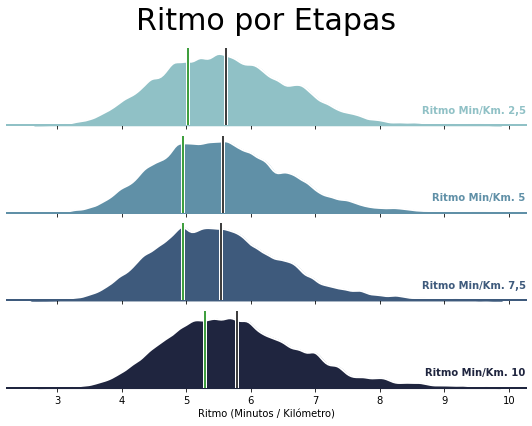

In [17]:
plot_grid(data)

In [18]:
mine[TIEMPOS].iloc[0]
categ_mine = mine["Edad"].item()
data.query("Edad == @categ_mine")
data.groupby("Edad").mean()[RITMOS].sort_values(RITMOS[-1])
data.groupby("Edad").std()[RITMOS]
data.groupby("Edad").count()[RITMOS]
data.groupby("Sexo").mean()[RITMOS].sort_values(RITMOS[-1])
data.groupby("Sexo").count()[RITMOS]
data.groupby(["Sexo", "Edad"]).mean()[TIEMPOS].sort_values(TIEMPOS[-1]).sort_index()
df = data[RITMOS + ["Sexo", "Edad"]].melt(["Sexo", "Edad"])

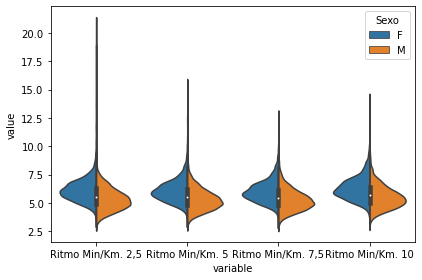

In [19]:
sns.violinplot(data=df, y="value", hue='Sexo', x="variable", kind='violin', split=True)
plt.tight_layout()

## Andando

Cúantas personas realizaron la carrera andando ?

> Ver https://www.healthline.com/health/exercise-fitness/average-walking-speed

In [20]:
len(data[data["Ritmo Min/Km. 10"] > 11.6])

7

Cuántas personas no terminaron la carrera?

In [21]:
data["Ritmo Min/Km. 10"].isnull().sum()

0

# Categorías

Se establecen las siguientes categorías:
- Absoluta Popular masculino y femenino *
- Júnior masculino y femenino
Nacidos en los años 2002, 2003, 2004 y 2005 (16, 17, 18 y 19 años cumplidos).
- Promesas masculinas y femeninas
Nacidos en los años 1999, 2000 y 2001 (20, 21 y 22 años cumplidos).
- Senior masculino y femenino
Nacidos entre el año 1987 y 1998.

## Veteranos masculino y femenino

- M-35 de 35 a 44 años cumplidos (nacidos entre 1977 y 1986).
- M-45 de 45 a 54 años cumplidos (nacidos entre 1967 y 1976).
- M-55 de 55 a 64 (nacidos entre el 1957 y 1966).
- M-65 de 65 en adelante (nacidos en 1956 y anteriores)
Handbike y sillas de atletismo masculino y femenino
(*) Esta categoría serán entregados los trofeos el día de la prueba en el
Estadio de Vallecas al concluir la Carrera Nationale-Nederlanden San
Silvestre Vallecana Internacional. Se habilitará una salida especial para las
categorías handbike y sillas de atletismo antes de la salida oficial de las
16:20. Se ruega a los participantes de estas categorías hagan uso de esta
salida con el fin de poder correr mejor al encontrarse el recorrido
totalmente libre.
> fuente: https://www.sansilvestrevallecana.com/descargas/ReglamentoPopular.pdf

### Cómo evolucionó la carrera (en media) por categorías?

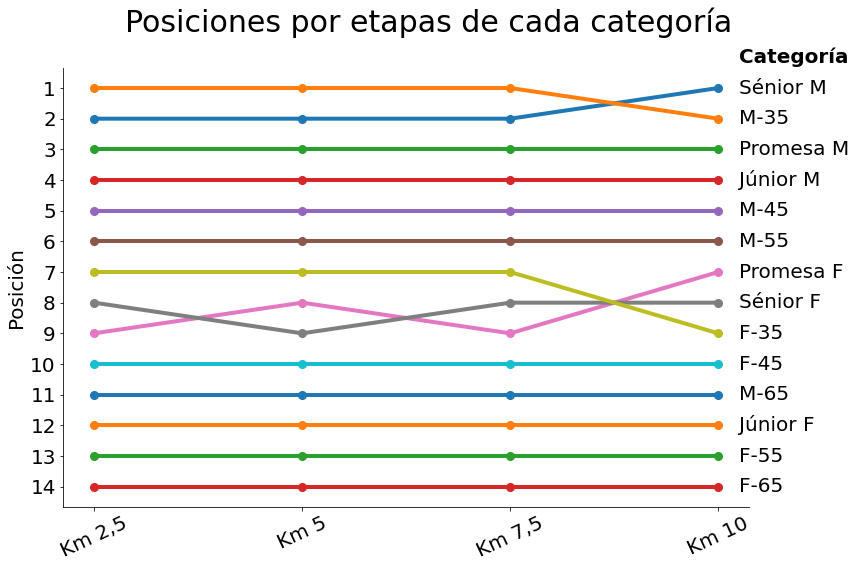

In [22]:
df = data.groupby("Categ.").mean()[TIEMPOS].rank().sort_values(TIEMPOS[-1], ascending=True).T
kw = dict(linewidth=4, markersize=8, marker="o", legend=False, figsize=(12,8))
ax = df.plot(**kw)
t_kw = dict(horizontalalignment='left', verticalalignment='center', fontsize=20)
plt.text(3.1, 0, "Categoría", **t_kw, fontweight="bold")
for c in df.columns:
    plt.text(3.1, df.loc[TIEMPOS[-1], c], c, **t_kw)
ax.invert_yaxis()
ax.set_yticks(range(1, 15))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel("Posición", fontsize=20)
plt.xticks(range(4), labels=["Km 2,5", "Km 5", "Km 7,5", "Km 10"], rotation=25, fontsize=20)
plt.yticks(fontsize=20)
plt.suptitle("Posiciones por etapas de cada categoría", fontsize=30)
plt.set_cmap("tab20")
plt.tight_layout()
plt.show()

Los que mas escalaron posiciones

In [23]:
df = data[TIEMPOS].rank().query("`Tiempo Km. 2,5 (Minutos)` - `Tiempo Km. 10 (Minutos)` > 9000")
data.loc[df.index][RITMOS]
df = data.groupby("Categ.", group_keys=False).apply(lambda x: x.head(5))
df = df.set_index("Nombre")[TIEMPOS]
df.loc["Yo"] = mine[TIEMPOS].iloc[0]
df = df.rank().T
# kw = dict(linewidth=4, markersize=8, marker="o", legend=False, figsize=(12,8))
# ax = df.plot(**kw)
# t_kw = dict(horizontalalignment='left', verticalalignment='center', fontsize=20)
# plt.text(3.1, 0, "Categoría", **t_kw, fontweight="bold")
# for c in df.columns:
#     plt.text(3.1, df.loc[TIEMPOS[-1], c], c, **t_kw)
# ax.invert_yaxis()
# ax.set_yticks(range(1, df.shape[1]))
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_ylabel("Posición", fontsize=20)
# plt.suptitle("Posiciones por etapas de cada categoría", fontsize=30)
# plt.set_cmap("tab20")
# plt.tight_layout()
# plt.show()

<AxesSubplot:ylabel='Categ.'>

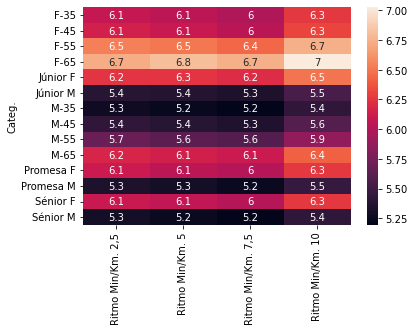

In [24]:
import seaborn as sns
df = data.groupby("Categ.").mean()[RITMOS]
sns.heatmap(df, annot=True)
# data.groupby("Categ.").mean()[RITMOS]